In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator, NearestNDInterpolator
import scipy.stats
from cartopy import crs as ccrs
import xarray as xr
M2x='diamlr_f001-diamlr_r001'
M2y='diamlr_f001-diamlr_r002'

In [11]:

# first, the T-grid files for the tidal analysis of SSH

fname_tide_ssh=['/gws/nopw/j04/class_vol2/senemo/jholt/NEMO_v4.2.2/EXP_test_mlr/SENEMO_1d_19760101_19761231_diamlr_coeffs_grid_T.nc'] 

In [12]:
ds_ssh={}
ssh_amp={}
ssh_pha={}
name='mlr_test'
ds_ssh[name]=xr.open_dataset(fname_tide_ssh[0])

In [29]:
def amp_pha_from_re_im(creal,cimag):
    cc=creal+cimag*1j
    amp=np.abs(cc).values.squeeze()
    pha=np.angle(cc)*180/np.pi
    return(amp,pha.squeeze())

In [31]:
ssh_amp[name],ssh_pha[name]= amp_pha_from_re_im(ds_ssh[name][M2x],ds_ssh[name][M2y])
ssh_amp[name]



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
ssh_amp['mlr_test'][ssh_amp['mlr_test']==0]=np.nan
ssh_pha['mlr_test'][np.isnan(ssh_amp['mlr_test'])]=np.nan

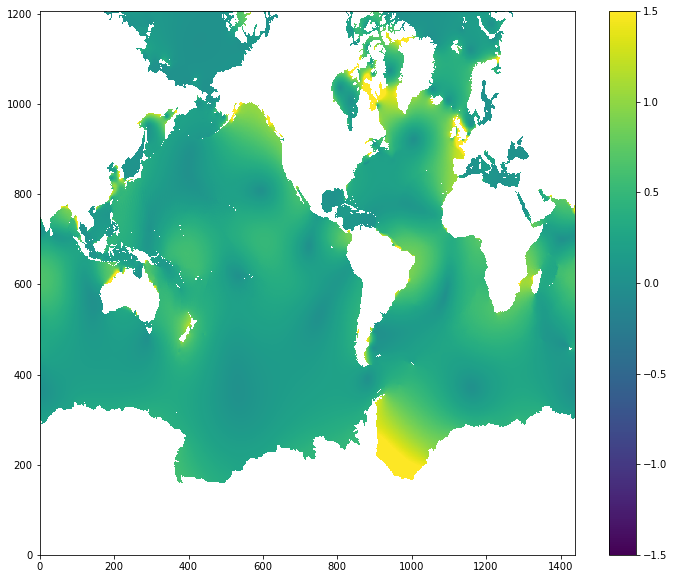

In [37]:
plt.figure(figsize=(12,10))
plt.pcolormesh(ssh_amp['mlr_test'],vmin=-1.5,vmax=1.5);plt.colorbar(orientation='vertical')

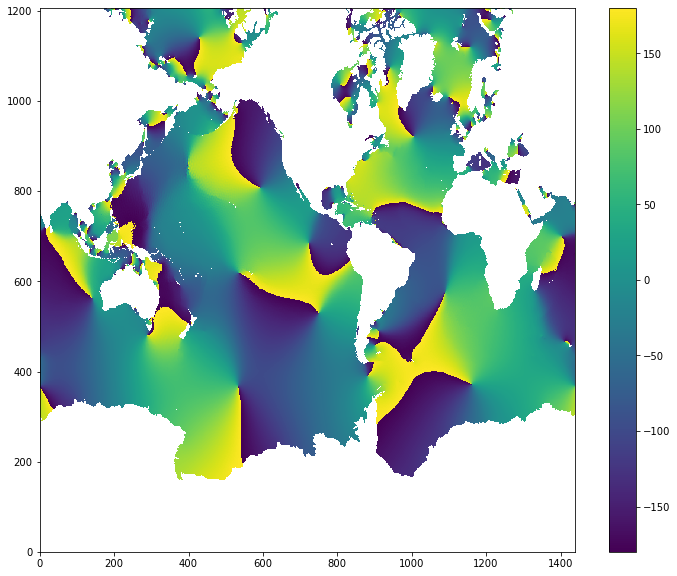

In [38]:
plt.figure(figsize=(12,10))
plt.pcolormesh(ssh_pha['mlr_test']);plt.colorbar(orientation='vertical')

In [40]:
M2FESamp_on_SENEMO_GRID_masked = xr.open_dataset('../data/external/regridded/FES2014_M2amp_on_SENEMO_GRID.nc')
M2FESpha_on_SENEMO_GRID_masked = xr.open_dataset('../data/external/regridded/FES2014_M2pha_on_SENEMO_GRID.nc')

M2FESamp=M2FESamp_on_SENEMO_GRID_masked.to_array().squeeze()
M2FESpha=M2FESpha_on_SENEMO_GRID_masked.to_array().squeeze()

Text(0.5, 1.0, 'FES M2 Amplitude')

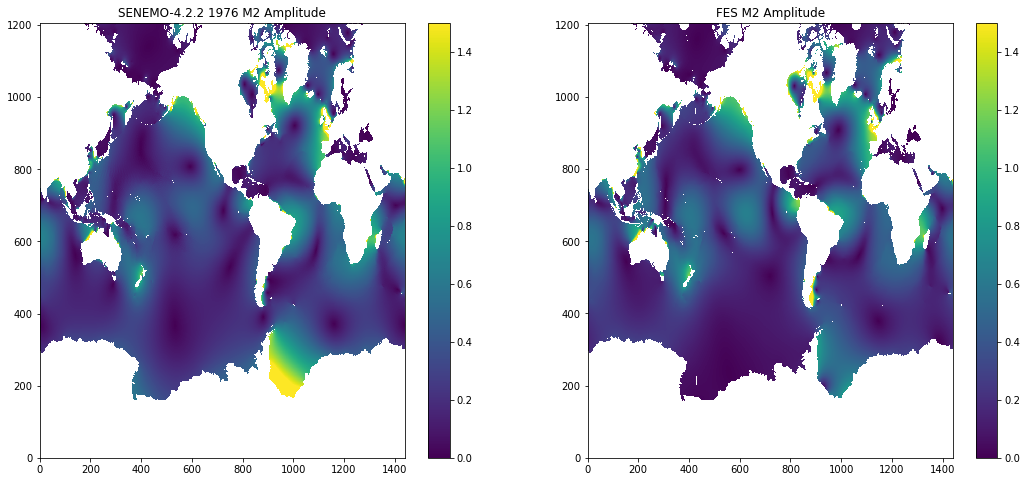

In [65]:
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.pcolormesh(ssh_amp['mlr_test'],vmin=0,vmax=1.5);plt.colorbar(orientation='vertical')
plt.title('SENEMO-4.2.2 1976 M2 Amplitude') 
plt.subplot(122)
plt.pcolormesh(M2FESamp,vmin=0,vmax=1.5);plt.colorbar(orientation='vertical')
plt.title('FES M2 Amplitude') 

Text(0.5, 1.0, 'FES M2 Phase')

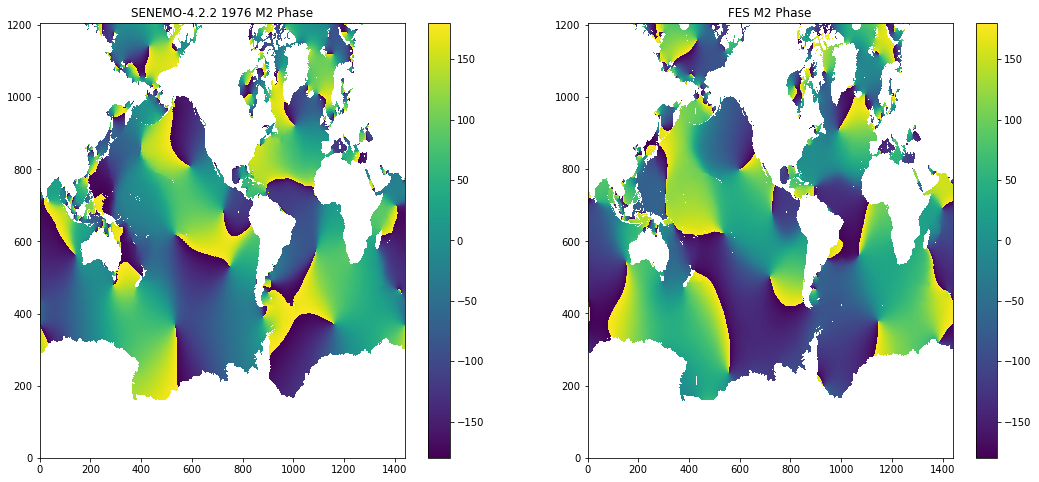

In [64]:
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.pcolormesh(ssh_pha['mlr_test'],vmin=-180,vmax=180);plt.colorbar(orientation='vertical')
plt.title('SENEMO-4.2.2 1976 M2 Phase') 
plt.subplot(122)
plt.pcolormesh(M2FESpha,vmin=-180,vmax=180);plt.colorbar(orientation='vertical')
plt.title('FES M2 Phase') 

In [44]:
err_ssh=ssh_amp[name][1:,:]-M2FESamp

In [49]:
fn_domcfg_MES=  "/gws/nopw/j04/class_vol2/senemo/RUNS2024r01/GS1p2_full/config/domain_cfg.nc"  #symbolic link, which points to correct file
  
domcfgMES = xr.open_dataset(fn_domcfg_MES)
# Create a land mask for the MES grid, with NaN over land
tl=domcfgMES.top_level
tl=np.squeeze(tl)
tl=tl[1:-1,1:-1]
tl=tl.where(tl>0.5,drop=True)
tl
nanpatch=np.ones([151,1440])*np.nan
np.shape(nanpatch)
maskMES=np.vstack((nanpatch,tl))
MEScell_t_area=np.squeeze(domcfgMES.e1t[0,1:-1,1:-1]*domcfgMES.e2t[0,1:-1,1:-1])*maskMES
MES_cell_t_area_sum=MEScell_t_area.sum(dim=None, keep_attrs=True)

In [51]:
np.sqrt(np.nansum((err_ssh**2)*MEScell_t_area)/MES_cell_t_area_sum)

<xarray.DataArray ()>
array(0.1257876)

In [52]:
np.nansum((err_ssh)*MEScell_t_area)/MES_cell_t_area_sum

<xarray.DataArray ()>
array(-0.00714541)